In [1]:
import pandas as pd

# Load the datasets
vc1 = pd.read_csv('dataset/violent_crime_1.CSV')
vc2 = pd.read_csv('dataset/violent_crime_2.CSV')
shootings = pd.read_csv('dataset/shootings.CSV')
regulations = pd.read_csv('dataset/regulations.CSV')
background_checks = pd.read_csv('dataset/Background checks - Daily.csv')

# Combine violent crime data, assuming PubDate is the common column and handle duplicates
violent_crimes = pd.concat([vc1, vc2]).drop_duplicates(subset='DocumentUrl')

/home/kslote/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Below we look at the time series of the media articles and examine the peaks.

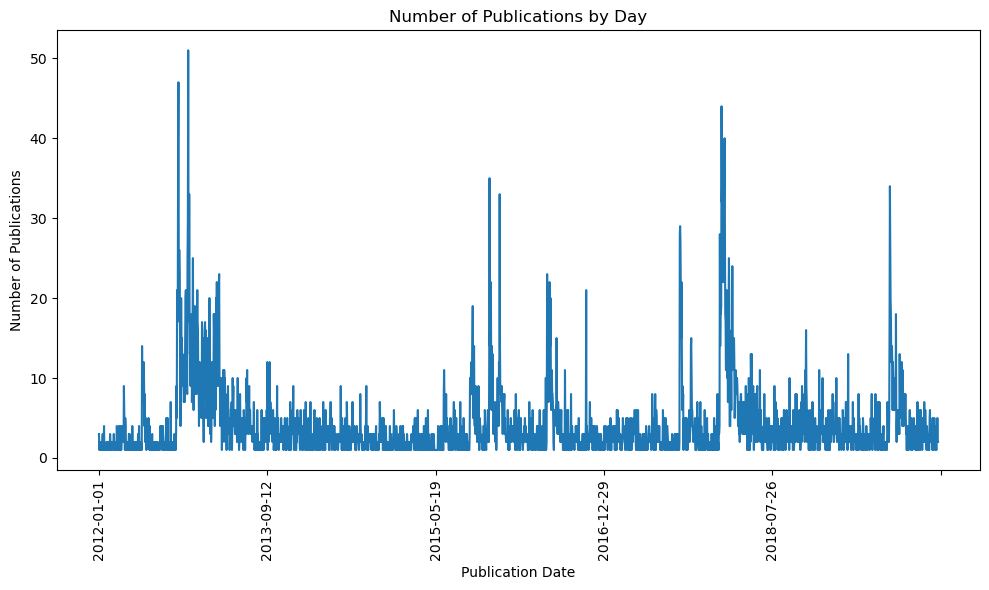

In [24]:
publication_counts = regulations['PubDate'].value_counts().sort_index()

# Plotting the publication counts by day
plt.figure(figsize=(10, 6))
publication_counts.plot()#kind='bar', color='skyblue')
plt.title('Number of Publications by Day')
plt.xlabel('Publication Date')
plt.ylabel('Number of Publications')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

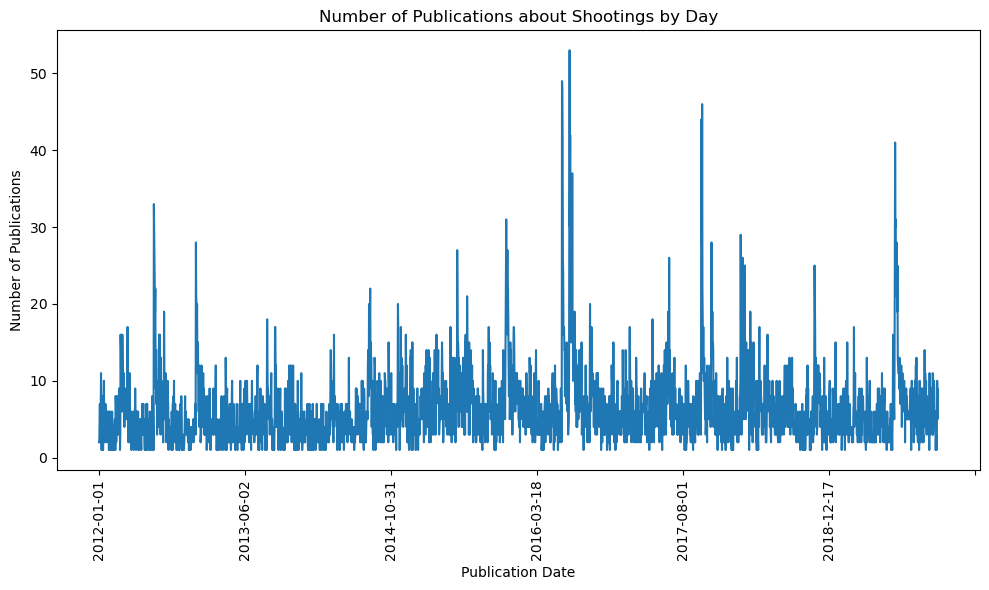

In [28]:
shootings_publication_counts = shootings['PubDate'].value_counts().sort_index()

# Plotting the publication counts by day
plt.figure(figsize=(10, 6))
shootings_publication_counts.plot()
plt.title('Number of Publications about Shootings by Day')
plt.xlabel('Publication Date')
plt.ylabel('Number of Publications')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

In [29]:
# Find the dates with the largest peaks
largest_peaks_shootings = shootings_publication_counts.nlargest()

# Display the result
print(largest_peaks_shootings)

PubDate
2016-07-09    53
2016-06-13    49
2016-06-14    48
2017-10-06    46
2017-10-03    44
Name: count, dtype: int64


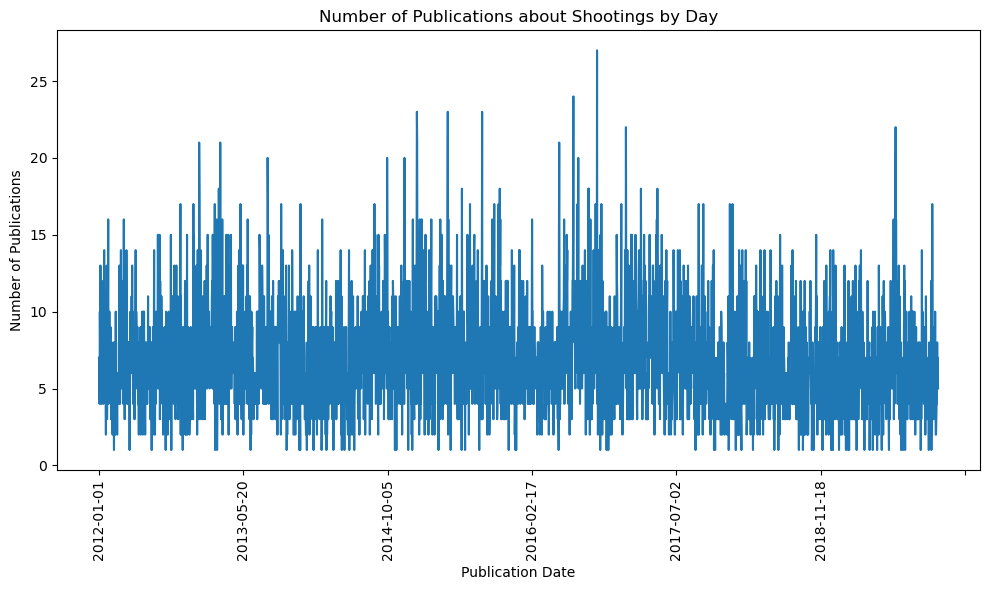

In [31]:
crime_publication_counts = violent_crimes['PubDate'].value_counts().sort_index()

# Plotting the publication counts by day
plt.figure(figsize=(10, 6))
crime_publication_counts.plot()
plt.title('Number of Publications about Shootings by Day')
plt.xlabel('Publication Date')
plt.ylabel('Number of Publications')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

In [33]:
# Find the dates with the largest peaks
largest_peaks_crime = crime_publication_counts.nlargest()

# Display the result
print(largest_peaks_crime)

PubDate
2016-09-30    27
2016-07-10    24
2015-01-14    23
2015-05-01    23
2015-08-28    23
Name: count, dtype: int64


In [12]:
# Calculate the total number of articles in each category
total_violent_crimes = len(violent_crimes)
total_shootings = len(shootings.drop_duplicates(subset='DocumentUrl'))
total_regulations = len(regulations.drop_duplicates(subset='DocumentUrl'))

# Calculate the intersections
violent_crimes_set = set([url.split("?")[0] for url in violent_crimes['DocumentUrl'].tolist()])
shootings_set = set([url.split("?")[0] for url in shootings['DocumentUrl'].tolist()])
regulations_set = set([url.split("?")[0] for url in regulations['DocumentUrl'].tolist()])

# Two-way intersections
violent_shooting_intersection = violent_crimes_set.intersection(shootings_set)
violent_regulation_intersection = violent_crimes_set.intersection(regulations_set)
shooting_regulation_intersection = shootings_set.intersection(regulations_set)

# Three-way intersection
three_way_intersection = violent_crimes_set.intersection(shootings_set).intersection(regulations_set)

# Print out the results
print(f"Total number of articles in 'Media Crime': {total_violent_crimes}")
print(f"Total number of articles in 'Media Shooting': {total_shootings}")
print(f"Total number of articles in 'Media Regulation': {total_regulations}")

print(f"Two-way intersection (Crime & Shooting): {len(violent_shooting_intersection)}")
print(f"Two-way intersection (Crime & Regulation): {len(violent_regulation_intersection)}")
print(f"Two-way intersection (Shooting & Regulation): {len(shooting_regulation_intersection)}")

print(f"Three-way intersection (Crime, Shooting, & Regulation): {len(three_way_intersection)}")

Total number of articles in 'Media Crime': 20511
Total number of articles in 'Media Shooting': 18338
Total number of articles in 'Media Regulation': 10431
Two-way intersection (Crime & Shooting): 1412
Two-way intersection (Crime & Regulation): 942
Two-way intersection (Shooting & Regulation): 0
Three-way intersection (Crime, Shooting, & Regulation): 0


# Analysis of Twitter

In [5]:
# Count the Twitter Posts
df_twitter = pd.read_csv('dataset/twitter_recalculated2.csv')
pro_reg_count = df_twitter['Pro-Reg Tweets Daily'].sum()
anti_reg_count = df_twitter['Anti-Reg Tweets Daily'].sum()
print(f"Pro-Regulation Twitter Count {pro_reg_count}")
print(f"Anti-Regulation Twitter Count {anti_reg_count}")

Pro-Regulation Twitter Count 238545
Anti-Regulation Twitter Count 155417


In [39]:
# Counts for Peaks of Tweets

# Find the row with the largest peak for Pro-Reg Tweets
pro_reg_peak_row = df_twitter.loc[df_twitter['Pro-Reg Tweets Daily'].idxmax()]

# Find the row with the largest peak for Anti-Reg Tweets
anti_reg_peak_row = df_twitter.loc[df_twitter['Anti-Reg Tweets Daily'].idxmax()]

# Print the results
print(f"Pro-Reg Peak Date: {pro_reg_peak_row['Date']}, Tweets: {pro_reg_peak_row['Pro-Reg Tweets Daily']}")
print(f"Anti-Reg Peak Date: {anti_reg_peak_row['Date']}, Tweets: {anti_reg_peak_row['Anti-Reg Tweets Daily']}")

Pro-Reg Peak Date: 2018-03-24, Tweets: 12586
Anti-Reg Peak Date: 2018-09-18, Tweets: 490


In [16]:
len(df_twitter['Anti-Reg Tweets Daily'])

2923

# Look at the count of Account posts on Twitter

In [14]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt



base_path = '/home/kslote/Desktop/guns/twitterproj/gun_data_additional/raw/'

# Lists of files
anti_reg = [
    "GunOwners_cts_proc.jsonl", 
    "USACarry_cts_proc.jsonl", 
    "NatlGunRights_cts_proc.jsonl", 
    "blkgunsmattr_cts_proc.jsonl", 
    "naaganational_cts_proc.jsonl", 
    "gunpolicy_cts_proc.jsonl", 
    "uscca_cts_proc.jsonl", 
    "nra_cts_proc.jsonl", 
    "BearingArmsCom_cts_proc.jsonl",
]
pro_reg = [
    "ProtestEasyGuns_cts_proc.jsonl", 
    "bradybuzz_cts_proc.jsonl", 
    "Everytown_cts_proc.jsonl", 
    "GunsDownAmerica_cts_proc.jsonl", 
    "GiffordsCourage_cts_proc.jsonl", 
    "AMarch4OurLives_cts_proc.jsonl", 
    "WAGV_cts_proc.jsonl", 
    "NewtownAction_cts_proc.jsonl", 
    "CSGV_cts_proc.jsonl", 
    "MomsDemand_cts_proc.jsonl", 
    "EFSGV_cts_proc.jsonl", 
]

# Function to load JSONL files into a DataFrame and add necessary columns
def load_jsonl_files(file_list, directory):
    data = []
    for file_name in file_list:
        file_path = os.path.join(directory, file_name)
        account_name = file_name.split('_')[0]
        with open(file_path, 'r') as file:
            for line in file:
                line = line.strip()
                if line:
                    try:
                        record = json.loads(line)
                        record['twitter_account'] = account_name
                        record['source_file'] = file_name
                        data.append(record)
                    except json.JSONDecodeError:
                        continue
    return pd.DataFrame(data)

# Load data into DataFrames
anti_reg_df = load_jsonl_files(anti_reg, base_path)
pro_reg_df = load_jsonl_files(pro_reg, base_path)

# Convert 'start' and 'end' columns to datetime
anti_reg_df['start'] = pd.to_datetime(anti_reg_df['start'])
anti_reg_df['end'] = pd.to_datetime(anti_reg_df['end'])
pro_reg_df['start'] = pd.to_datetime(pro_reg_df['start'])
pro_reg_df['end'] = pd.to_datetime(pro_reg_df['end'])

In [15]:
from IPython.display import display

# Filter dataframes by date range
start_date = '2012-01-01'
end_date = '2020-01-01'

anti_reg_filtered = anti_reg_df[(anti_reg_df['start'] >= start_date) & (anti_reg_df['end'] < end_date)]
pro_reg_filtered = pro_reg_df[(pro_reg_df['start'] >= start_date) & (pro_reg_df['end'] < end_date)]

# Aggregate counts by twitter account
anti_reg_counts = anti_reg_filtered.groupby('twitter_account')['tweet_count'].sum()
pro_reg_counts = pro_reg_filtered.groupby('twitter_account')['tweet_count'].sum()

anti_reg_counts_df = anti_reg_counts.reset_index()
anti_reg_counts_df.columns = ['Twitter Account', 'Tweet Count']

pro_reg_counts_df = pro_reg_counts.reset_index()
pro_reg_counts_df.columns = ['Twitter Account', 'Tweet Count']

# Display the tables
print("Anti-regulation accounts tweet counts between 2012-01-01 and 2020-01-01:")
display(anti_reg_counts_df)

print("\nPro-regulation accounts tweet counts between 2012-01-01 and 2020-01-01:")
display(pro_reg_counts_df)

Anti-regulation accounts tweet counts between 2012-01-01 and 2020-01-01:


,Twitter Account,Tweet Count
0,BearingArmsCom,22238
1,GunOwners,8463
2,NatlGunRights,6356
3,USACarry,34849
4,blkgunsmattr,4279
5,gunpolicy,12519
6,naaganational,405
7,nra,16527
8,uscca,49746



Pro-regulation accounts tweet counts between 2012-01-01 and 2020-01-01:


,Twitter Account,Tweet Count
0,AMarch4OurLives,25866
1,CSGV,58865
2,EFSGV,2511
3,Everytown,21739
4,GiffordsCourage,17339
5,GunsDownAmerica,2599
6,MomsDemand,37289
7,NewtownAction,21562
8,ProtestEasyGuns,24462
9,WAGV,10951


# Time Series Analysis

Below are the cells that run to get the ADA p-values and other summary statistics for the time series.

In [49]:
import pandas as pd

# Load the datasets
# There is a little overlap because we could'nt export all the results in one go.
violent_crime_1 = pd.read_csv('dataset/violent_crime_1.CSV') 
violent_crime_2 = pd.read_csv('dataset/violent_crime_2.CSV')
shootings = pd.read_csv('dataset/shootings.CSV')
regulations = pd.read_csv('dataset/regulations.CSV')
background_checks = pd.read_csv('dataset/Background checks - Daily.csv')

# Correct the filename typo if needed
shootings_file_corrected = shootings

# Combine violent crime data, assuming PubDate is the common column and handle duplicates
violent_crimes = pd.concat([vc1, vc2]).drop_duplicates(subset='DocumentUrl')

# Convert date columns where necessary
violent_crimes['PubDate'] = pd.to_datetime(violent_crimes['PubDate'])
shootings_file_corrected['PubDate'] = pd.to_datetime(shootings_file_corrected['PubDate'])
regulations['PubDate'] = pd.to_datetime(regulations['PubDate'])

# Convert the date in the background_checks dataframe
background_checks['Date'] = pd.to_datetime(background_checks[['Year', 'Month', 'Day']])

# Filter background_checks between 2012 and 2020
mask = (background_checks['Date'] >= '2012-01-01') & (background_checks['Date'] <= '2020-01-01')
background_checks_filtered = background_checks[mask]

# Aggregate counts by day for each dataframe
vc_counts = violent_crimes.groupby('PubDate').size().reset_index(name='Crime')
shootings_counts = shootings_file_corrected.groupby('PubDate').size().reset_index(name='Shootings')
regulations_counts = regulations.groupby('PubDate').size().reset_index(name='Regulations')
background_checks_counts = background_checks_filtered.groupby('Date').agg({
    'Raw count of background checks': 'sum',
    'Seasonally-adjusted and detrended backround checks': 'sum'
}).reset_index()

# Rename columns to match user's request
background_checks_counts.rename(columns={
    'Date': 'PubDate',
    'Raw count of background checks': 'Background Checks',
    'Seasonally-adjusted and detrended backround checks': 'Background Checks Adjusted'
}, inplace=True)

# Merge all dataframes on the date column
final_df = pd.merge(pd.merge(pd.merge(vc_counts, shootings_counts, on='PubDate', how='outer'),
                             regulations_counts, on='PubDate', how='outer'),
                    background_checks_counts, left_on='PubDate', right_on='PubDate', how='outer')

final_df['Background Checks'] = final_df['Background Checks'].str.replace(',', '').astype(int)
df_twitter = pd.read_csv('dataset/twitter_recalculated2.csv')
final_df['Pro-Reg Tweets Daily'] = df_twitter['Pro-Reg Tweets Daily']
final_df['Anti-Reg Tweets Daily'] = df_twitter['Anti-Reg Tweets Daily']

final_df = final_df.rename(columns={"PubDate": "Date"})
final_df['Date'] = pd.to_datetime(final_df['Date'])
# Resetting the index
final_df.set_index('Date', inplace=True)
final_df = final_df.fillna(0)
final_df.head()

,Crime,Shootings,Regulations,Background Checks,Background Checks Adjusted,Pro-Reg Tweets Daily,Anti-Reg Tweets Daily
Date,,,,,,,
2012-01-01,7.0,2.0,3.0,15622,"2,819",2,16
2012-01-02,0.0,2.0,1.0,32754,433,14,25
2012-01-03,7.0,5.0,2.0,47401,"-2,519",36,40
2012-01-04,4.0,7.0,2.0,48021,"-5,677",28,28
2012-01-05,10.0,3.0,1.0,51367,"-5,104",47,41


In [70]:
from scipy.stats import anderson
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

# Function to calculate the ADA test and return the p-value
def calculate_ada(series):
    result = adfuller(series)
    p_value = result[1]
    return p_value

# Function to calculate the KPSS test and return the p-value
def calculate_kpss(series):
    result = kpss(series)
    #print(result)
    p_value = result[1]
    return p_value

# Summary statistics
summary_statistics = {
    'Column': [],
    'ADA p-value': [],
    'KPSS p-value': [],
    'Date of Largest Occurrence': [],
    'Mean': [],
    'Total': []
}

cols = ['Crime', 'Shootings', 'Regulations', 'Background Checks', 'Pro-Reg Tweets Daily', 'Anti-Reg Tweets Daily']
# Loop through each column and calculate the necessary statistics
for column in cols:

    series = final_df[column]    
    ada_p_value = calculate_ada(series)
    kpss_p_value = calculate_kpss(series)
    largest_occurrence_date = series.idxmax().strftime('%Y-%m-%d')
    mean_value = series.mean()
    total_value = series.sum()
    
    summary_statistics['Column'].append(column)
    summary_statistics['ADA p-value'].append(ada_p_value)
    summary_statistics['KPSS p-value'].append(kpss_p_value)
    summary_statistics['Date of Largest Occurrence'].append(largest_occurrence_date)
    summary_statistics['Mean'].append(mean_value)
    summary_statistics['Total'].append(total_value)

# Create a DataFrame to display the summary statistics
summary_df = pd.DataFrame(summary_statistics)
summary_df

/tmp/ipykernel_2531781/3366895487.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series)
/tmp/ipykernel_2531781/3366895487.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series)
/tmp/ipykernel_2531781/3366895487.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series)
/tmp/ipykernel_2531781/3366895487.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series)
/tmp/ipykernel_2531781/3366895487.py:13: InterpolationWarning: The test 

,Column,ADA p-value,KPSS p-value,Date of Largest Occurrence,Mean,Total
0,Crime,6.410907e-09,0.01,2016-09-30,7.017106,20511.0
1,Shootings,2.439239e-22,0.01,2016-07-09,6.273691,18338.0
2,Regulations,2.092008e-05,0.10,2013-01-17,3.568594,10431.0
3,Background Checks,3.703350e-03,0.01,2017-11-24,65744.206295,192170315.0
4,Pro-Reg Tweets Daily,5.700414e-30,0.10,2018-03-24,81.609648,238545.0
5,Anti-Reg Tweets Daily,1.041142e-01,0.01,2018-09-18,53.170373,155417.0
